In [49]:
# Figure out which Premium clients are not renewing
# Setup the environment and import the needed packages
import pandas as pd
import xlrd
import numpy as np
import itertools
import re
import sys
# !{sys.executable} -m pip install plotly

In [50]:
#Read in the file
in_df = pd.read_csv('File.csv', encoding='utf-8', low_memory=False)

# convert column to datetime pandas
in_df['Start Date'] = pd.to_datetime(in_df['Start Date'])
in_df['End Date'] = pd.to_datetime(in_df['End Date'])

# Determine Category
# create a list of our conditions
conditions = [
    (in_df["End Date"] >= '12-31-2021'),
    (in_df["End Date"] <= '12-31-2021') & (in_df["End Date"] > '09-30-2021'),
    (in_df["End Date"] <= '09-30-2021')
    ]
# create a list of the values we want to assign for each condition
values = ['value1', 'value2', 'value3']

# create a new column and use np.select to assign values to it using our lists as arguments
in_df['value1'] = np.select(conditions, values)
#Sorting and Grouping 
#Sort by column with end dates
in_df.sort_values(by=['cat1','End Date','Column'], ascending=[True, True, True], inplace=True)
# Select rows based on conition
subcat = ['subcat1', 'subcat2'] 
in_df = in_df[in_df['Column'].isin(subcat)]

In [94]:
# Subset for only Active
in_df = in_df[in_df['Column Name']=='value1']
#Gantt chart for Active
import plotly.express as px
fig = px.timeline(act_df, x_start=act_df['Start Date'], x_end=act_df['End Date'], y=act_df['Column'], width=1000, 
                  height=600, title='Title')
fig.update_yaxes(autorange="reversed") # otherwise tasks are listed from the bottom up
fig.update_yaxes(automargin=True)
fig.update_xaxes(dtick='M3')
fig.update_layout(
    font_family="Arial",
    title_font_color="black",
    font_size=6)
fig.show()

In [95]:
# subset for only At-Risk
atr_df = in_df[in_df['Risk Category']=='At Risk']
#Gantt chart for At-Risk
import plotly.express as px
fig = px.timeline(atr_df, x_start=atr_df['Start Date'], x_end=atr_df['End Date'], y=atr_df['Client Name'], width=1000, 
                  height=600, title='At-Risk Premium Client Contracts')
fig.update_yaxes(autorange="reversed") # otherwise tasks are listed from the bottom up
fig.update_yaxes(automargin=True)
fig.update_xaxes(dtick='M3')
fig.update_layout(
    font_family="Arial",
    title_font_color="black",
    font_size=6)
fig.show()

In [96]:
#Subset for only Expired
exp_df = in_df[in_df['Risk Category']=='Expired']
#Gantt chart for Expired
import plotly.express as px
fig = px.timeline(exp_df, x_start=exp_df['Start Date'], x_end=exp_df['End Date'], y=exp_df['Client Name'], width=1000, 
                  height=600, title='Expired Premium Client Contracts')
fig.update_yaxes(autorange="reversed") # otherwise tasks are listed from the bottom up
fig.update_yaxes(automargin=True)
fig.update_xaxes(dtick='M3')
fig.update_layout(
    font_family="Arial",
    title_font_color="black",
    font_size=4)
fig.show()

In [28]:
#Only get clients where Year = 2021 and have no other years
newdf.head()

,Client Name,Contract,Service,Client #,DAC,Platform,Start Date,End Date,Primary TSM,Channel,Tier 1,Tier 2,Year,Month,Day
0,121 FINANCIAL CREDIT UNION,A61B8N,CTS-Proactive,6151526,91762,AIX,2021-04-11,9999-12-31,Sandra Macha,BP,JACK HENRY & ASSOCIATES INC,NaN,9999,12,31
1,3M CO,ATCFC9,CTS-Proactive,713280,91477,Storage,2021-02-10,9999-12-31,Jay Pancost,BP,TECHDATA CORPORATION,"EVOLVING SOLUTIONS, INC.",9999,12,31
2,3M CO,ATCFC9,CTS-Proactive,705517,91477,Storage,2021-02-10,9999-12-31,Jay Pancost,BP,TECHDATA CORPORATION,"EVOLVING SOLUTIONS, INC.",9999,12,31
3,A SUR NET INC,A563LZ,CTS-Proactive,645804,90518,AIX,2020-07-02,9999-12-31,Gasan Khatum,BP,ARROW ENTERPRISE COMPUTING SOLUTIONS,"MAINLINE INFORMATION SYSTEMS, INC.",9999,12,31
4,A SUR NET INC,A563LZ,CTS-Proactive,645804,90518,IBM i,2020-07-02,9999-12-31,Brian Wilde,BP,ARROW ENTERPRISE COMPUTING SOLUTIONS,"MAINLINE INFORMATION SYSTEMS, INC.",9999,12,31


<AxesSubplot:xlabel='Serial Start', ylabel='Serial End'>

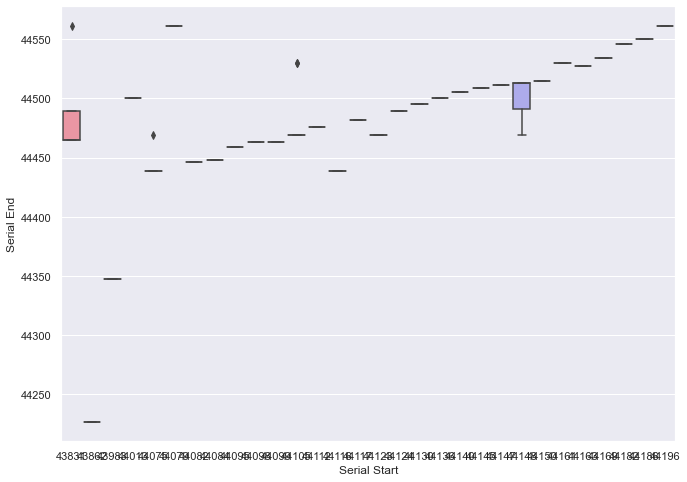

In [127]:
# Create a boxplot
import seaborn as sns
sns.set(rc={'figure.figsize':(11,8)})
sns.boxplot(x=in_df['Serial Start'], y=in_df['Serial End'])

In [67]:
#write resulting dataframe to csv
in_df.to_csv(path_or_buf='SortedPremYrMoDay.csv', index=False)